In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")
!ls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
f_train = '/content/drive/My Drive/Colab Notebooks/karunya/train_con.csv'
f_valid = '/content/drive/My Drive/Colab Notebooks/karunya/validation_con.csv'
train_df = pd.read_csv(f_train)
valid_df = pd.read_csv(f_valid)
y_train=train_df['angry']
del train_df['angry']
x_train=train_df.values
y_valid=valid_df['angry']
del valid_df['angry']
x_valid=valid_df.values
x_train= x_train.reshape(26503, 48, 48,1)
x_valid= x_valid.reshape(7065, 48, 48,1)
from numpy import array
y_train=array(y_train)
y_valid=array(y_valid)
i=0
while i< len(y_train):
    if y_train[i]=='angry':
         y_train[i]=0
    elif y_train[i]=='disgust':
         y_train[i]=1
    elif y_train[i]=='fear':
         y_train[i]=2
    elif y_train[i]=='happy':
         y_train[i]=3
    elif y_train[i]=='sad':
         y_train[i]=4
    elif y_train[i]=='surprise':
         y_train[i]=5
    elif y_train[i]=='neutral':
         y_train[i]=6
    i=i+1
i=0
while i< len(y_valid):
    if y_valid[i]=='angry':
         y_valid[i]=0
    elif y_valid[i]=='disgust':
         y_valid[i]=1
    elif y_valid[i]=='fear':
         y_valid[i]=2
    elif y_valid[i]=='happy':
         y_valid[i]=3
    elif y_valid[i]=='sad':
         y_valid[i]=4
    elif y_valid[i]=='surprise':
         y_valid[i]=5
    elif y_valid[i]=='neutral':
         y_valid[i]=6
    i=i+1
x_train=x_train/255
x_valid=x_valid/255
y_train=y_train.astype(int)
y_valid=y_valid.astype(int)


Mounted at /content/drive/
'Copie de karunya_2.ipynb'			     photo.jpg
'Copy of yolov4_webcam.ipynb'			    'real time capture'
 data1.csv					     RNN_pfe.ipynb
 data-2024.csv					     sadboy.jpg
 fashion_useless.ipynb				     sadd.png
 happy.jpg					     sad.jpg
 karunya					     segmentation_essai1.ipynb
 karunya1.ipynb					     surprizedboy.jpg
 karunya_2.ipynb				     surprize.jpg
'karunya-final work-.ipynb'			     testRNN.ipynb
'Karunya_training_validation accuracy curve.ipynb'   tp_robotic_gradient_decent.ipynb
 model.h5					     tp_robotic.ipynb
'offers filtrage_ksi.ipynb'			    'tp robotics.ipynb'
'pfe_PPG real world.ipynb'			     tp_robotics.ipynb
'pfe_Real_World dataset.ipynb'			     wow.jpg
 pfe_test_ARIMAX_GBM.ipynb


In [ ]:
!pip install keras


In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(164, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #model.add(Conv2D(512, (3, 3),activation='relu',padding='same'))
    #model.add(Conv2D(512, (3, 3),activation='relu',padding='same'))
    #model.add(BatchNormalization())
    #model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()

    return model
model=my_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 164)         │          94,628 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 164)         │             656 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 164)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │         189,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,643,355 (6.27 MB)

 Trainable params: 1,641,939 (6.26 MB)

 Non-trainable params: 1,416 (5.53 KB)

In [ ]:
checkpoint_path="/content/drive/My Drive/Colab Notebooks/real time capture/training1/cp241.weights.h5"

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


In [ ]:

checkpoint = tf.train.Checkpoint(model=model)


In [ ]:
checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)

In [ ]:
model.load_weights(checkpoint_path)
print("Weights restored successfully!")

Weights restored successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 62 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
#2024 try to restore. but results are not the same as 2022
loss, acc = model.evaluate(x_valid, y_valid, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


221/221 - 7s - 30ms/step - accuracy: 0.6078 - loss: 1.0518
Restored model, accuracy: 60.78%


In [ ]:
loss, acc = model.evaluate(x_valid, y_valid, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


221/221 - 9s - loss: 0.9814 - accuracy: 0.6485 - 9s/epoch - 41ms/step
Restored model, accuracy: 64.85%


---------------just pass


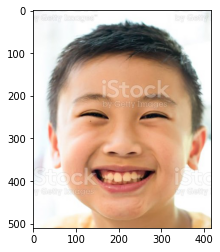

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')
show_image('/content/drive/My Drive/Colab Notebooks/happy.jpg')

In [ ]:
img =tf.keras.utils.load_img('/content/drive/My Drive/Colab Notebooks/happy.jpg',
                             grayscale=True, target_size=(48, 48))
x = tf.keras.preprocessing.image.img_to_array(img)
x=x.astype(float)
x= x.reshape(1,48,48,1)
x=x/255
prediction = model.predict(x)
print(prediction)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[[2.8731267e-06 4.5770145e-11 1.5936207e-07 9.9966359e-01 2.3117970e-04
  2.1810149e-07 1.0205463e-04]]


In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
m=0
a=prediction[0].astype(float)
i=0
while i<7:
    if a[i]>m:
        m=a[i]
        ind=i
        print('----')
    i=i+1
print('Expression Prediction:',objects[ind])

----
----
Expression Prediction: happy


In [ ]:
import cv2

In [ ]:
frame=cv2.imread("/content/drive/My Drive/Colab Notebooks/sadd.png")
frame.shape

(991, 1300, 3)

In [ ]:

gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape

(991, 1300)

In [ ]:
FaceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces=FaceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.putText(frame, objects[ind],
                        (50,200 ), cv2.FONT_HERSHEY_SIMPLEX, 7,
                        (100,20,0), 5, cv2.LINE_AA, False)
    facess=FaceCascade.detectMultiScale(roi_gray)

    if len(facess)==0:
        print("face not detected")
    else:
        for(ex,ey,ew,eh)in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

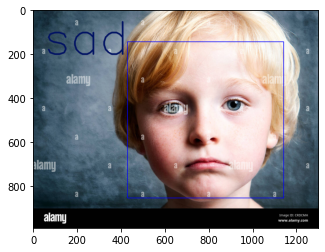

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

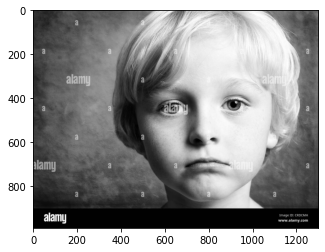

In [ ]:
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

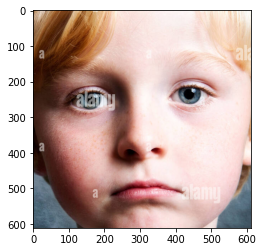

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [ ]:
cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB).shape

(611, 611, 3)

In [ ]:
x=cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB)

In [ ]:
import numpy as np

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2990 * r + 0.5870 * g + 0.1140 * b

    return gray

In [ ]:
x=rgb2gray(x)

In [ ]:
x=x.reshape(1,611,611,1)

In [ ]:
from skimage.transform import resize
y = resize(x, (1,48,48,1))

In [ ]:
y=y.reshape(48,48)

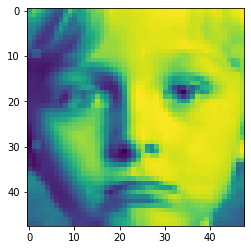

In [ ]:
plt.imshow(y)

In [ ]:
x= y.reshape(1,48,48,1)
x=x/255
prediction = model.predict(x)
print(prediction)

[[1.5319551e-04 2.5696294e-09 1.5123474e-03 2.1297332e-05 9.5184422e-01
  5.1050336e-07 4.6468459e-02]]


In [ ]:
m=0
a=prediction[0].astype(float)
i=0
while i<7:
    if a[i]>m:
        m=a[i]
        ind=i
        print('----')
    i=i+1
print('Expression Prediction:',objects[ind])

----
----
----
Expression Prediction: sad


-----------------------------------
-------------------
---------------return

In [ ]:
def rgb2gray(rgb):
  r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
  gray = 0.2990 * r + 0.5870 * g + 0.1140 * b

  return gray

In [ ]:
def predictionfromlink(link):

  frame=cv2.imread(link)
  gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  FaceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  faces=FaceCascade.detectMultiScale(gray,1.1,4)
  for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess=FaceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
      print("face not detected")
    else:
      for(ex,ey,ew,eh)in facess:
        face_roi=roi_color[ey:ey+eh,ex:ex+ew]

  x=cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB)
  print("cadrage...")


  x=rgb2gray(x)
  print(" converted...")
  from skimage.transform import resize
  y = resize(x, (48,48))
  print("resized")
  x= y.reshape(1,48,48,1)
  print("reshaped...")
  x=x/255
  print("start prediction...")
  prediction = model.predict(x)
  global objects
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  m=0
  a=prediction[0].astype(float)
  i=0
  while i<7:
    if a[i]>m:
      m=a[i]
      global ind
      ind=i
    i=i+1
  print('Expression Prediction:',objects[ind])

In [ ]:
 objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

In [ ]:
def predictionfromframe(frame):

  global gray
  gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  FaceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  global faces
  faces=FaceCascade.detectMultiScale(gray,1.1,4)

  for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess=FaceCascade.detectMultiScale(roi_gray)
    #if len(facess)==0:
      #print("face not detected")
    #else:
    for(ex,ey,ew,eh)in facess:
      global face_roi
      face_roi=roi_color[ey:ey+eh,ex:ex+ew]

  x=cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB)
  #print("cadrage...")


  x=rgb2gray(x)
 # print(" converted...")
  from skimage.transform import resize
  y = resize(x, (48,48))
 # print("resized")
  x= y.reshape(1,48,48,1)
  #print("reshaped...")
  x=x/255
  #print("start prediction...")
  prediction = model.predict(x)
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  m=0
  a=prediction[0].astype(float)
  i=0
  while i<7:
    if a[i]>m:
      m=a[i]
      global ind
      ind=i
    i=i+1
  #print('Expression Prediction:',objects[ind])

In [ ]:
###2024- since the accuracy decreased the results are not the same
predictionfromlink("/content/drive/My Drive/Colab Notebooks/sadd.png")

cadrage...
 converted...
resized
reshaped...
start prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Expression Prediction: neutral


In [ ]:
predictionfromlink("/content/drive/My Drive/Colab Notebooks/surprize.jpg")

cadrage...
 converted...
resized
reshaped...
start prediction...
1/1 [==============================] - 0s 26ms/step
Expression Prediction: surprise


-------------------------

In [ ]:
predictionfromlink("/content/drive/My Drive/Colab Notebooks/surprize.jpg")

cadrage...
 converted...
resized
reshaped...
start prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Expression Prediction: surprise


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
###2024 same next code done but results are not the same. saaad

<IPython.core.display.Javascript object>

Saved to photo.jpg


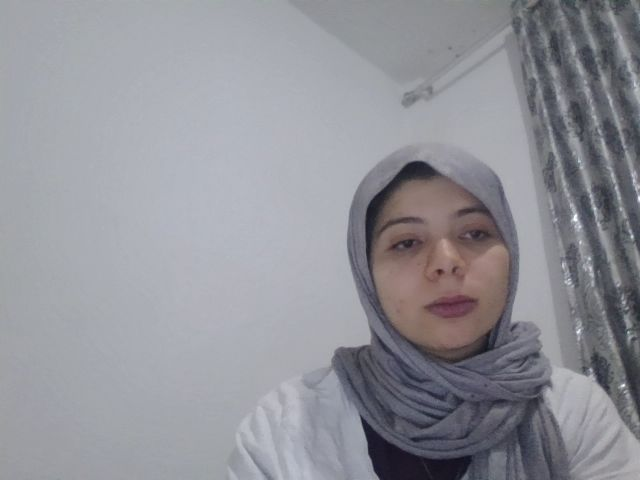

cadrage...
 converted...
resized
reshaped...
start prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Expression Prediction: neutral


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
predictionfromlink("/content/drive/My Drive/Colab Notebooks/photo.jpg")

<IPython.core.display.Javascript object>

Saved to photo.jpg


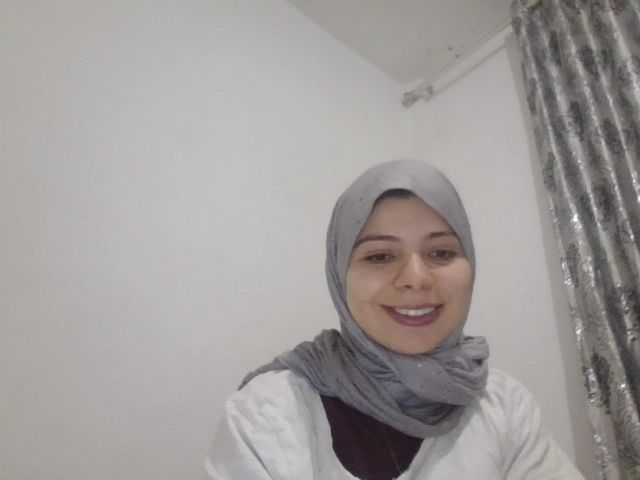

cadrage...
 converted...
resized
reshaped...
start prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Expression Prediction: happy


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
predictionfromlink("/content/drive/My Drive/Colab Notebooks/photo.jpg")

<IPython.core.display.Javascript object>

Saved to photo.jpg


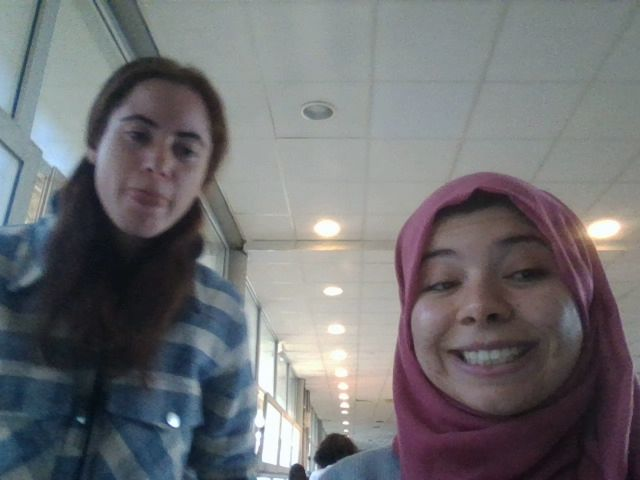

face not detected
cadrage...
 converted...
resized
reshaped...
start prediction...
1/1 [==============================] - 0s 31ms/step
Expression Prediction: happy


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
predictionfromlink("/content/drive/My Drive/Colab Notebooks/photo.jpg")

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
import PIL
import io
from base64 import b64decode, b64encode
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
Data=[]
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    predictionfromframe(frame)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=frame[y:y+h, x:x+w]
        bbox_array = cv2.putText(bbox_array, objects[ind],
                        (100, 100 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (255,0,0), 2, cv2.LINE_AA, False)

        bbox_array = cv2.rectangle(bbox_array, (x,y),(x+w,y+h),(255,0,0),2)


    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    #convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    #update bbox so next frame gets new overlay
    bbox = bbox_bytes
    Data.append(ind)

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
Data

[6, 6, 3, 3, 3, 2, 2, 2, 2, 3, 5, 5, 2, 5, 6, 5, 3, 6, 6, 6, 6]

In [ ]:
# convert array into dataframe
DF = pd.DataFrame(Data)

# save the dataframe as a csv file
DF.to_csv("/content/drive/My Drive/Colab Notebooks/data-2024.csv")

In [ ]:
# based on the saved data we can know the expressions of that person during the video capture.